# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mehrran Rahnamania
2.   Student Number: 400206251


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("/content/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset[['X']][:int(len(dataset['X']) * 0.8)]
y_train = dataset[['Y']][:int(len(dataset['Y']) * 0.8)]

x_test = dataset[['X']][int(len(dataset['X']) * 0.8):]
y_test = dataset[['Y']][int(len(dataset['Y']) * 0.8):]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
one_train = np.ones((len(x_train), 1))
x_tr = np.concatenate((one_train, x_train), axis=1)
one_test = np.ones((len(x_test), 1))
x_te = np.concatenate((one_test, x_test), axis=1)
m = np.linalg.inv((x_tr.T).dot(x_tr)).dot(x_tr.T).dot(y_train)

In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = (np.linalg.norm(y_train - x_tr.dot(m)) ** 2) / len(x_train)
test_error = (np.linalg.norm(y_test - x_te.dot(m)) ** 2) / len(x_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

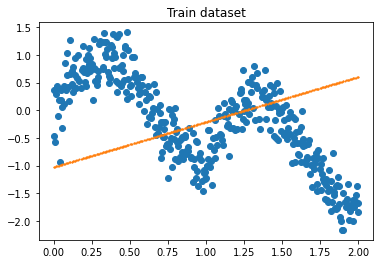

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

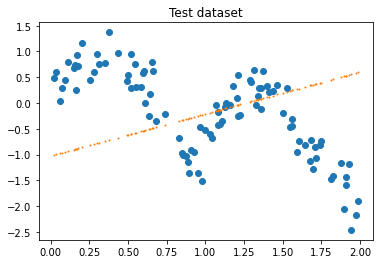

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable? بله

What about the line you drew in the last part? بله

Was it appropriate for the dataset? خیر
<br><br/>
Explain what are the main problems here.
 

مدل مورد استفاده ما بیش از حد ساده است و نمی تواند داده های مورد نظر ما را مدل کند

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-((1 / (2 * (hyperparameter ** 2))) * (np.linalg.norm(xi - the_query_point) ** 2)))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = len(train_X)
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = (np.linalg.inv((X.T).dot(W).dot(X))).dot((X.T).dot(W).dot(train_Y))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
predicted_test = [predict(x_train, y_train, query, hyperparameter=0.01) for query in x_test]
pr_test = np.array(predicted_test)[:,0,0]
c = [pr_test[a][0] for a in range(len(pr_test))]
pr_te = np.array([c]).T
er = ((y_test - pr_te) ** 2) / len(y_test)
error = sum(er)
print(f"MSE test error: {error}")

MSE test error: [0.09575447]


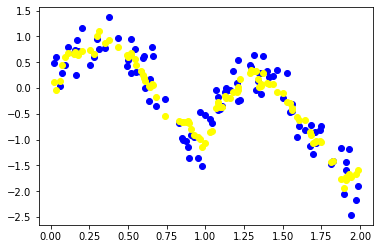

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

بله چون از مدل با پیچیدگی بیشتر استفاده کردیم 

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = ... # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indices = ... # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = ...
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = ...
    return error, predicted_y

In [ ]:
k = ...
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: Ellipsis


TypeError: ignored

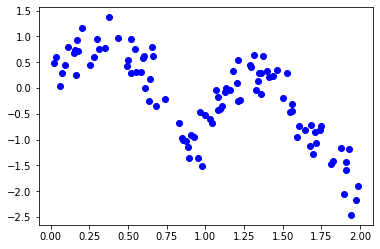

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-